In [1]:
import numpy as np
import ctypes

# mfcc_dump = 'mfcc_result.bin'
mfcc_dump = 'mfcc_hopeful.bin'
waveform_dump = 'waveform_in.bin'
waveform_float_dump = 'waveform_float_converted.bin'
waveform_float_norm_dump = 'waveform_float_normalized.bin'


MFCC_SIZE = 490
mfcc_type = ctypes.c_float * MFCC_SIZE
with open(mfcc_dump, 'rb') as file:
    bin = file.read()
mfcc = mfcc_type.from_buffer_copy(bin)

waveform_len = 15872
with open(waveform_dump, 'rb') as file:
    bin = file.read()
waveform = (ctypes.c_int16 * waveform_len).from_buffer_copy(bin)

with open(waveform_float_dump, 'rb') as file:
    bin = file.read()
waveform_float = (ctypes.c_float * waveform_len).from_buffer_copy(bin)

with open(waveform_float_norm_dump, 'rb') as file:
    bin = file.read()
waveform_norm = (ctypes.c_float * waveform_len).from_buffer_copy(bin)

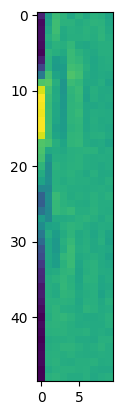

In [2]:
import matplotlib.pyplot as plt

im = np.asarray(mfcc, dtype=ctypes.c_float)
im = im.reshape((49, 10))
plt.imshow(im)

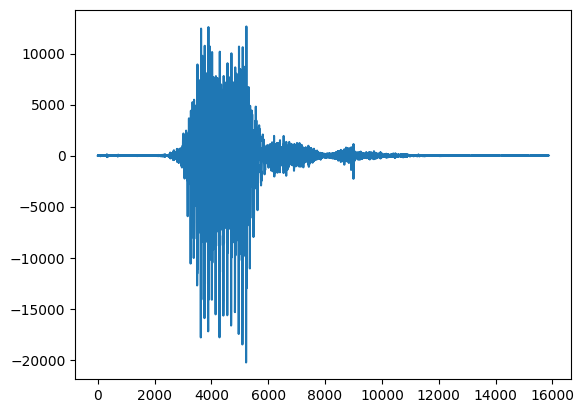

In [3]:
plt.plot(waveform)

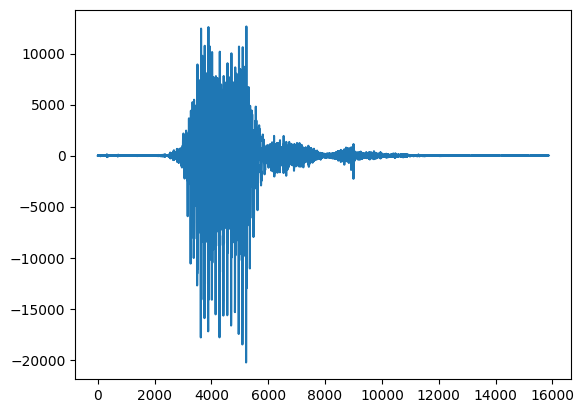

In [6]:
plt.plot(waveform_float)

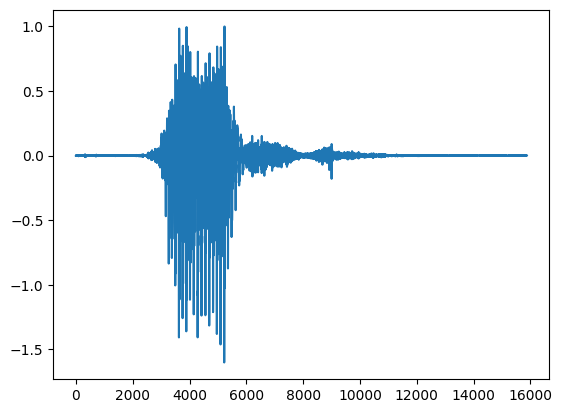

In [11]:
plt.plot(waveform_norm)

65536


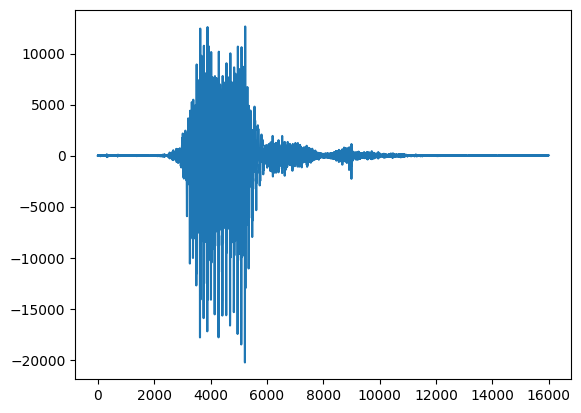

In [8]:
import numpy as np
import matplotlib.pyplot as plt

with open('example_wave.h', 'r') as file:
    header = file.read()

header = header.split(',')
header = np.array(list(map(lambda x: int(x), header)))
plt.plot(header)
print(2**16)

In [24]:

mfcc_bins = ['mfcc0.bin', 'mfcc1.bin', 'mfcc2.bin', 'mfcc3.bin']
wave_bins = ['wave0.bin', 'wave1.bin', 'wave2.bin']

STFT_STRIDE = 320
MFCC_BLOCK = 10
dbg_mfcc = []
dbg_wave = []
for mfcc_bin in mfcc_bins:
    with open(mfcc_bin, 'rb') as file:
        bin = file.read()
    dbg_mfcc.append(( ctypes.c_float * MFCC_BLOCK ).from_buffer_copy(bin))

for wave_bin in wave_bins:
    with open(wave_bin, 'rb') as file:
        bin = file.read()
    dbg_wave.append(( ctypes.c_float * STFT_STRIDE ).from_buffer_copy(bin))

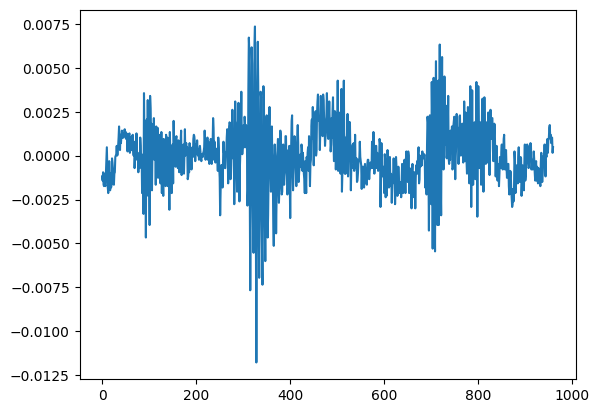

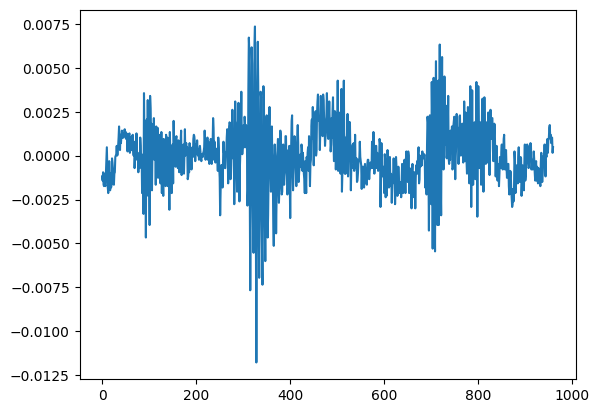

In [26]:

plt.figure()
cur_section = waveform_norm[0: (len(dbg_wave))* STFT_STRIDE]
plt.plot(cur_section)

plt.figure()
tmp = np.concatenate(dbg_wave)
plt.plot(tmp)

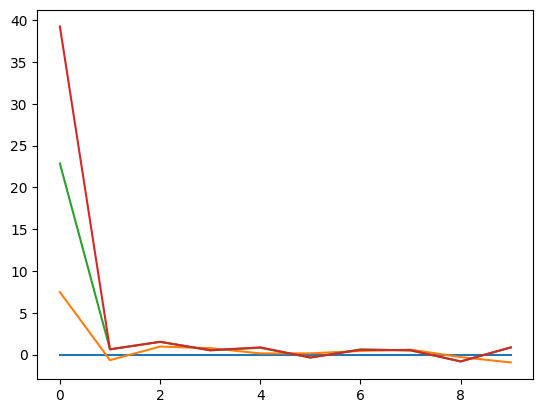

In [18]:
for mfcc in dbg_mfcc:
    plt.plot(mfcc)